In [1]:
from input import *

# Vorgespannter Träger

Die folgende Versuchsnachrechnung zeigt die Möglichkeiten des Modells im Bezug mit einer Vorspannung. 

## Versuchsbeschrieb
In diesem Kapitel wird der vorgespannte Träger T6 nach dem Versuchsbericht @sigrist_versuche_1993 mit dem Drehfedermodell nachgerechnet. Es handelt sich um einen einfachen Balken mit einer Auskragung. Die Geometrie des Versuchs in Längsrichtung ist in @fig-geometrie_t6 gezeigt. 

![Geometrie des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_geometrie_laengs.svg){#fig-geometrie_t6}

Der dazugehörige Querschnitt ist in @fig-geometrie_qs_t6 gezeigt.

![Geometrie des Querschnitts des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_geometrie_qs.svg){#fig-geometrie_qs_t6}

Die Lastsituation zeigt die @fig-last_t6. Am Ende des Kragarms greift eine Einzellast $P$ an. Mit $Q$ wird eine Streckenlast simuliert. Der Träger ist an den Punkten $A$ und $B$ einfach gelagert.

![Lagerung und Laststellung des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_last_laengs.svg){#fig-last_t6}

Die verlegte schlaffe Bewehrung in Längsrichtung ist in der @fig-bewehrung_laengs_t6 gezeigt.

![Bewehrungslayout in Längsrichtung des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_bewehrung_laengs.svg){#fig-bewehrung_laengs_t6}

Das Bewehrungslayout im Querschnitt zeigt die @fig-bewehrung_qs_t6.

![Bewehrungslayout im Querschnitt des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_bewehrung_qs.svg){#fig-bewehrung_qs_t6}

Die Führung der Vorspannung ist in der @fig-vorspannung_t6 gezeigt.

![Vorspannungslayout des Versuchsträgers T6. Horizontaler Abstand [m] und vertikale Position [mm], gemessen von der Unterkante des Trägers, entnommen aus @sigrist_versuche_1993](../imgs/T6_vorspannung_laengs.svg){#fig-vorspannung_t6}






## Parameter

In diesem Abschnitt werden die allgemein verwendeten Parameter aufgelistet. Gegliedert nach den einzelnen Aspekten des Versuchs.

### Vorspannung

Die Parameter der Vorspannung sind die Folgenden. Es ist die Initiale Vorspannkraft, sowie die entsprechenden Querschnittseigenschaften aufgezeigt:

In [2]:
%%render params 
f_py = (1706 *N/mm**2) 
f_pt = (1855*N/mm**2)
V_om = (730*kN)
A_p = 596*mm**2
E_p = 190000*N/mm**2

<IPython.core.display.Latex object>

### Beton

Die Parameter sind Mittelwerte aus Betonwürfel- und Betonzylinderproben.

In [3]:
%%render params 2

f_c = 52.1 *N/mm**2
f_cts = 4.3 *N/mm**2
E_c = 50200 *N/mm**2
rho_c = 2409 *kg/m**3
epsilon_cu = (1.63/1000*los).to(percent)

<IPython.core.display.Latex object>

Das Spannungs-Dehnungs-Verhalten des Betons ist in der @fig-sigma_epc_t6 dargestellt. Definiert ist das Verhalten im positiven Spannungsbereich bis zum Erreichen der Betonzugfestigkeit $f_{cts}$. Das Verhalten im negativen Spannungsbereich wird mit einem linear-elastischem ideal-plastischem Verhalten approximiert.

In [4]:
# epsilon_c = np.array([f_cts / E_c, 0, -f_c/E_c, -epsilon_cu])
# sigma_c = np.array([ f_cts.magnitude, 0,-f_c.magnitude, -f_c.magnitude])*f_c.units

# plt.plot(epsilon_c, sigma_c, color='black')


# plt.xlabel(f'$\\varepsilon_c$ [-]')
# plt.ylabel(f'$\\sigma_c$ [N/mm$ ^2$]')


# plt.show()

### Betonstahl

Mittelwerte der Zugproben.

In [5]:
%%render params 

Diam_1 = 10*mm
Diam_2 = 12*mm
Diam_3 = 14*mm

f_sy = 500*(MPa)
f_st = 630*(MPa)
epsilon_sv = (24/1000*los).to(percent)
epsilon_sg = (130/1000*los).to(percent)
E_s = 205000*N/mm**2

<IPython.core.display.Latex object>

Die entsprechende Spannungs-Dehnungs-Beziehung ist in @fig-sigma_eps_t6 gezeigt. Als Annahme gilt, dass die Stäbe lediglich unter Zug belastet werden. Die Druckbewehrung wird bei der Bestimmung der Momenten-Krümmungs-Beziehung vernachlässigt. Das Verhalten wird mit einem Bilinearem Verhalten approximiert.

In [6]:
# epsilon_s = np.array([0, epsilon_sv, epsilon_sg])
# sigma_s = np.array([ 0,f_sy.magnitude, f_st.magnitude])*f_st.units

# plt.plot(epsilon_s, sigma_s, color='black')

# plt.xlabel(f'$\\varepsilon_s$ [-]')
# plt.ylabel(f'$\\sigma_s$ [N/mm$ ^2$]')


# plt.show()

### Geometrie

#### Querschnitt

Die Parameter der Geometrie des Querschnitts beziehen sich auf die @fig-geometrie_qs_t6.

In [7]:
%%render params

h_1 = 180*mm
h_2 = 50*mm
h_3 = 400*mm
h_4 = 30*mm
h_5 = 140*mm
h_tot = h_1 + h_2 + h_3 + h_4 + h_5

b_1_inf = 90*mm
b_2_inf = 220*mm
b_3_inf = 90*mm

b_tot_inf = b_1_inf + b_2_inf + b_3_inf
b_tot_sup = 800*mm

<IPython.core.display.Latex object>

#### Längsrichtung

Der Abschluss des Querschnitts wird nicht mehr weiter verfolgt. Vereinfacht wird der I-Querschnitt als konstant über die Länge betrachtet.

Die beschriebenen Abmessungen $L_n$ sind jeweils vom Stabanfang gemessen.

In [8]:
%%render params

L_1 = 3500*mm
L_2 = 9600*mm

L_tot = L_1 + L_2

<IPython.core.display.Latex object>

#### Lasten

In [9]:
%%render params

L_P = (500*mm).to(m)
L_q = 3.5*m + 300*mm
l_q = 15 *0.6*m #Streckenlast



<IPython.core.display.Latex object>

## Modellierung

### Lastfälle

#### Versuch

Der Versuch wird in den folgenden Laststufen belastet.

#### Vorspannung

/var/folders/6v/tynjq1yn7y3bk7pgzzw8btj00000gn/T/ipykernel_41455/439166993.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  params_2, _ = curve_fit(parabel, x_2, y_2)
/var/folders/6v/tynjq1yn7y3bk7pgzzw8btj00000gn/T/ipykernel_41455/439166993.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  params_3, _ = curve_fit(parabel, x_3, y_3)
/Users/pascalgitz/miniconda3/envs/engineering/lib/python3.11/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


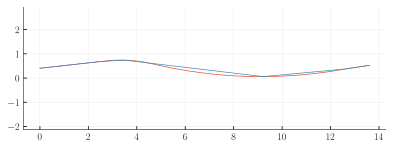

742.9090552013473 59.889175174565935


In [27]:
x_1 = np.array([0,2.5])
x_2 = np.array([2.5, 3.5, 4.5])
x_3 = np.array([4.5, 9.2, 12.6])
x_4 = np.array([12.6, 13.6])

y_1 = np.array([404, 684])
y_2 = np.array([684, 740, 620])
y_3 = np.array([620, 60, 373])
y_4 = np.array([373, 525])



# Funktion, die die Parabel repräsentiert
def parabel(x, a, b, c):
    return a * x**2 + b * x + c

params_2, _ = curve_fit(parabel, x_2, y_2)
params_3, _ = curve_fit(parabel, x_3, y_3)

x_2_spaced = np.linspace(min(x_2), max(x_2), 1000)
x_3_spaced = np.linspace(min(x_3), max(x_3), 1000)

y_2_spaced = parabel(x_2_spaced, *params_2)
y_3_spaced = parabel(x_3_spaced, *params_3)


x_vorspann_geometrie = np.concatenate(
    (
        x_1,
        x_2_spaced,
        x_3_spaced,
        x_4
    ),
    axis=0
)

y_vorspann_geometrie = np.concatenate(
    (
        y_1,
        y_2_spaced,
        y_3_spaced,
        y_4
    ),
    axis=0
)

plt.plot(x_vorspann_geometrie, y_vorspann_geometrie/1000)
plt.plot(np.array([0, 2.5, 3.5, 4.5, 9.2, 12.6,13.6])*m,np.array([404, 684, 740, 620, 60, 373, 525])*mm / 1000)
plt.axis('equal')

plt.show()


print(max(y_vorspann_geometrie),
      min(y_vorspann_geometrie))

/Users/pascalgitz/miniconda3/envs/engineering/lib/python3.11/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


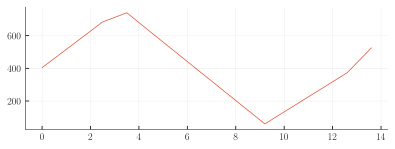

In [11]:
kabel_x = np.array([0, 2.5, 3.5, 4.5, 9.2, 12.6,13.6])*m
kabel_z = np.array([404, 684, 740, 620, 60, 373, 525])*mm


plt.plot(kabel_x, kabel_z)
plt.show()

## Momenten-Krümmungs-Beziehung

Die Momenten-Krümmungs-Beziehung zeigt bei diesem Versuch eine gewisse Komplexität. Grundsätzlich gilt es für jede Abstufung der Bewehrung eine separate Momenten-Krümmungs-Beziehung herzuleiten. 

Wird bei der Vorspannung Spannkraftverluste berücksichtigt, so wirkt der Restquerschnitt des Spannstahls als schlaffe Bewehrung bei Belastung mit. Dies hat Einfluss auf das Momenten-Krümmungs-Verhalten. Durch die parabolische Geometrie des Spannkabels, gilt es die Momenten-Krümmungs-Beziehung unter Variation der Spannkabellage zu definieren, was die Komplexität der Momenten-Krümmungs-Beziehung erhöht.

Um den Rechenaufwand gering zu halten wird lediglich ein qualitatives Verhalten der Momenten-Krümmungs-Beziehung angestrebt. Dabei wird der Querschnitt beim Fliessen der Zugbewehrung betrachtet, sowie wird der Biegewiderstand bestimmt. Diese Punkte werden linear mit einander verbunden. Des Weiteren wird die Druckbewehrung stehts vernachlässigt.



![Querschnittsanalyse mit Fliessen der Zugbewehrung und elastischer Betondruckzone, qualitativer Verlauf](../imgs/QS_14_analyse_4.svg){#fig-qs_fliessen_qualitativ}

![Querschnittsanalyse mit erreichter Zugfestigkeit in der Bewehrung und vollständig plastifizierter Betondruckzone, qualitativer Verlauf](../imgs/QS_14_analyse_5.svg){#fig-qs_widerstand_qualitativ}

In [12]:
from sectionproperties.pre import Geometry

import concreteproperties.stress_strain_profile as ssp
from concreteproperties import (
    Concrete,
    ConcreteSection,
    SteelBar,
    add_bar_rectangular_array,
)
from concreteproperties.results import MomentCurvatureResults

In [13]:
conc_linear_no_tension = Concrete(
    name="Linear-elastisch ideal-plastisch Beton",
    density=2.4e-6,
    stress_strain_profile=ssp.ConcreteLinearNoTension(
        elastic_modulus=E_c.magnitude, ultimate_strain=epsilon_cu.to(los).magnitude, compressive_strength=f_c.magnitude,
    ),
    ultimate_stress_strain_profile=ssp.BilinearStressStrain(
        compressive_strength=f_c.magnitude,
        compressive_strain=(f_c/E_c).magnitude,
        ultimate_strain=epsilon_cu.to(los).magnitude,
    ),
    flexural_tensile_strength=f_cts.magnitude,
    colour="lightgrey",
)

steel = SteelBar(
    name="Linear-elastisch linear-plastisch Stahl",
    density=7.85e-6,
    stress_strain_profile=ssp.SteelHardening(
        yield_strength=f_sy.magnitude,
        elastic_modulus=E_s.magnitude,
        fracture_strain=epsilon_sg.to(los).magnitude,
        ultimate_strength=f_st.magnitude
    ),
    colour="grey",
)

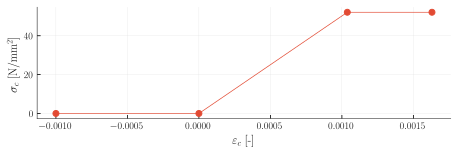

In [14]:
# | label: fig-sigma_epc_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten des Betons"

ax_sigma_eps = conc_linear_no_tension.stress_strain_profile.plot_stress_strain(render=False)

ax_sigma_eps.set_title('')
ax_sigma_eps.set_xlabel('$\\varepsilon_c$ [-]')
ax_sigma_eps.set_ylabel('$\\sigma_c$ [N/mm$^2$]')
plt.show()

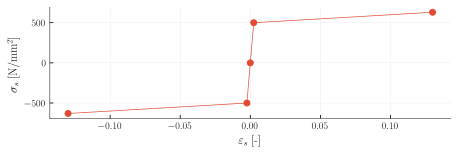

In [15]:
# | label: fig-sigma_eps_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten der Längsbewehrung"

ax_steel = steel.stress_strain_profile.plot_stress_strain(render = False)

ax_steel.set_title('')
ax_steel.set_xlabel('$\\varepsilon_s$ [-]')
ax_steel.set_ylabel('$\\sigma_s$ [N/mm$^2$]')

plt.show()

In [16]:

points_qs = [
             (200,0),
             (600,0),
             (600, 180),
             (600-90, 180+50),
             (600-90, 180+50+400),
             (800, 180+50+400+30),
             (800, 800),
             (0,800),
             (0,800-140),
             (200 + 90, 800-140-30),
             (200+90, 180+50),
             (200, 180),
            ]


facets_qs = [
    (0,1),
    (1,2),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (6,7),
    (7,8),
    (8,9),
    (9,10),
    (10,11),
    (11,0),
]
control_pts_qs = [(400,200)]

beam = Geometry.from_points(
    points=points_qs,
    facets=facets_qs,
    control_points=control_pts_qs
)


In [17]:
s_top_horiz = 90

bars_A = add_bar_rectangular_array(geometry=beam, 
                          area=14**2 / 4 *3.14, 
                          material=steel,
                          n_x=2,
                          x_s=220-60,
                          n_y=1,
                          y_s=140+30-60,
                          anchor=(200+90+30,800-30),
                          )

bars_B = add_bar_rectangular_array(geometry=bars_A, 
                          area=14**2 / 4 *3.14, 
                          material=steel,
                          n_x=2,
                          x_s=220-60,
                          n_y=1,
                          y_s=140+30-60,
                          anchor=(200+90+30,800-170+30),
                          )

bars_C = add_bar_rectangular_array(geometry=bars_B, 
                          area=12**2 / 4 *3.14, 
                          material=steel,
                          n_x=2,
                          x_s=400-60,
                          n_y=2,
                          y_s=140+30-60-30/290 * s_top_horiz,
                          anchor=(200+30,800-170+30/290*s_top_horiz+30),
                          )

bars_D = add_bar_rectangular_array(geometry=bars_C, 
                          area=12**2 / 4 *3.14, 
                          material=steel,
                          n_x=2,
                          x_s=400+s_top_horiz*2-60,
                          n_y=2,
                          y_s=140+30-60-30/290 * 2*s_top_horiz,
                          anchor=(200-90+30,800-170+30/290*2*s_top_horiz+30),
                          )

bars_E = add_bar_rectangular_array(geometry=bars_D, 
                          area=12**2 / 4 *3.14, 
                          material=steel,
                          n_x=2,
                          x_s=400+4*s_top_horiz-60,
                          n_y=2,
                          y_s=140+30-60-30/290 * 3*s_top_horiz,
                          anchor=(200-2*s_top_horiz+30,800-170+30/290*3*s_top_horiz+30),
                          )

bars_F = add_bar_rectangular_array(geometry=bars_E, 
                          area=12**2 / 4 *3.14, 
                          material=steel,
                          n_x=2,
                          x_s=220-60,
                          n_y=2,
                          y_s=150,
                          anchor=(200+90+30,400-75),
                          )

bars_G = add_bar_rectangular_array(geometry=bars_F, 
                          area=14**2 / 4 *3.14, 
                          material=steel,
                          n_x=2,
                          x_s=400-60,
                          n_y=2,
                          y_s=180-60,
                          anchor=(200+30,30),
                          )

bars_H = add_bar_rectangular_array(geometry=bars_G, 
                          area=14**2 / 4 *3.14, 
                          material=steel,
                          n_x=2,
                          x_s=220-60,
                          n_y=1,
                          y_s=150,
                          anchor=(200+90+30,180+10),
                          )

bars_I = add_bar_rectangular_array(geometry=bars_H, 
                          area=14**2 / 4 *3.14, 
                          material=steel,
                          n_x=2,
                          x_s=220-60,
                          n_y=1,
                          y_s=180-60,
                          anchor=(200+90+30,30),
                          )

prestress = add_bar_rectangular_array(geometry=bars_I, 
                          area=30**2 / 4 *3.14, 
                          material=steel,
                          n_x=1,
                          x_s=220-60,
                          n_y=1,
                          y_s=180-60,
                          anchor=(400,700),
                          )


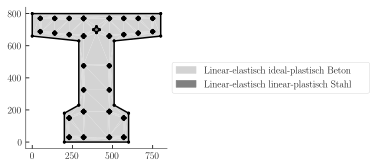

In [18]:
# assign concrete material to first geometry in CompoundGeometry object
prestress.geoms[0].material = conc_linear_no_tension

# create ConcreteSection object
conc_sec = ConcreteSection(prestress)

# plot section first time only

ax = conc_sec.plot_section(title='')


plt.show()


In [19]:

# perform moment curvature analysis and store results
# bending about major axis so theta = pi/2
moment_curvature_results = conc_sec.moment_curvature_analysis(n=300e3,
    theta=0, kappa_inc=2.5e-7, progress_bar=False
)


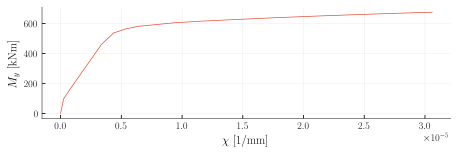

In [20]:
ax_M_chi = MomentCurvatureResults.plot_results(moment_curvature_results, fmt="-", render=False)

ax_M_chi.set_title('')
ax_M_chi.set_xlabel('$\\chi$ [1/mm]')
ax_M_chi.set_ylabel('$M_y$ [kNm]')

plt.show()

## Schiebungs-Beziehung

## Versuchsresultate

![Verformungsverlauf des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_durchbiegung_laengs.svg){#fig-durchbiegung_laengs_t6}


![Last-Verformungs-Verhalten des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_durchbiegungen.svg){#fig-durchbiegung_t6}